In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("Data/jeans_data.csv")

In [3]:
df.head()

,name,brand,distress,waist_rise,length,fit,number_of_pockets,occasion,reversible,stretch,price,rating,number_of_ratings
0,Men Mid-Rise Slim Fit Jeans,Marks & Spencer,Clean Look,Mid-Rise,Regular,Slim Fit,5,Casual,No,Non Stretchable,₹1119,4.8,13 Ratings
1,Men 511 Slim Fit Stretchable Jeans,Levis,Clean Look,Mid-Rise,Regular,Slim Fit,5,Casual,No,Stretchable,₹1499,4.4,259 Ratings
2,Men Black Slim Fit Mid-Rise Clean Look Stretch...,Urbano Fashion,Clean Look,Mid-Rise,Regular,Slim Fit,5,Casual,No,Stretchable,₹601,3.9,17.1k Ratings
3,Men 512 Tapered Fit Light Fade Stretchable Jeans,Levis,Clean Look,Mid-Rise,Regular,Tapered Fit,5,Casual,No,Stretchable,₹1829,4.1,96 Ratings
4,Men Bootcut Mid-Rise Clean Look Stretchable Jeans,Jack & Jones,Clean Look,Mid-Rise,Regular,Bootcut,5,Casual,No,Stretchable,₹2124,4.4,148 Ratings


## Data Cleaning

In [4]:
df.isnull().sum()

name                    0
brand                   0
distress                0
waist_rise              0
length                  0
fit                     0
number_of_pockets     243
occasion              130
reversible            130
stretch                42
price                   0
rating               3757
number_of_ratings       0
dtype: int64

In [5]:
df['rating'] = df.groupby('brand')['rating'].transform(lambda x: x.fillna(x.mean()))

In [6]:
number_of_pockets_mode = df['number_of_pockets'].mode()[0]
occasion_mode = df['occasion'].mode()[0]
reversible_mode = df['reversible'].mode()[0]
stretch_mode = df['stretch'].mode()[0]

df['number_of_pockets'].fillna(number_of_pockets_mode, inplace=True)
df['occasion'].fillna(occasion_mode, inplace=True)
df['reversible'].fillna(reversible_mode, inplace=True)
df['stretch'].fillna(stretch_mode, inplace=True)

In [7]:
df.dropna(inplace = True)

In [8]:
df.isnull().sum()

name                 0
brand                0
distress             0
waist_rise           0
length               0
fit                  0
number_of_pockets    0
occasion             0
reversible           0
stretch              0
price                0
rating               0
number_of_ratings    0
dtype: int64

In [9]:
df['price'] = df['price'].str.replace('₹', '').astype(int)

In [10]:
def convert_ratings(ratings_str):
    ratings_str = ratings_str.replace(" Ratings", "")
    if 'k' in ratings_str:
        return int(float(ratings_str.replace('k', '')) * 1000)
    return int(ratings_str)

df['number_of_ratings'] = df['number_of_ratings'].apply(convert_ratings)

In [11]:
df.head()

,name,brand,distress,waist_rise,length,fit,number_of_pockets,occasion,reversible,stretch,price,rating,number_of_ratings
0,Men Mid-Rise Slim Fit Jeans,Marks & Spencer,Clean Look,Mid-Rise,Regular,Slim Fit,5,Casual,No,Non Stretchable,1119,4.8,13
1,Men 511 Slim Fit Stretchable Jeans,Levis,Clean Look,Mid-Rise,Regular,Slim Fit,5,Casual,No,Stretchable,1499,4.4,259
2,Men Black Slim Fit Mid-Rise Clean Look Stretch...,Urbano Fashion,Clean Look,Mid-Rise,Regular,Slim Fit,5,Casual,No,Stretchable,601,3.9,17100
3,Men 512 Tapered Fit Light Fade Stretchable Jeans,Levis,Clean Look,Mid-Rise,Regular,Tapered Fit,5,Casual,No,Stretchable,1829,4.1,96
4,Men Bootcut Mid-Rise Clean Look Stretchable Jeans,Jack & Jones,Clean Look,Mid-Rise,Regular,Bootcut,5,Casual,No,Stretchable,2124,4.4,148


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12072 entries, 0 to 12361
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               12072 non-null  object 
 1   brand              12072 non-null  object 
 2   distress           12072 non-null  object 
 3   waist_rise         12072 non-null  object 
 4   length             12072 non-null  object 
 5   fit                12072 non-null  object 
 6   number_of_pockets  12072 non-null  object 
 7   occasion           12072 non-null  object 
 8   reversible         12072 non-null  object 
 9   stretch            12072 non-null  object 
 10  price              12072 non-null  int32  
 11  rating             12072 non-null  float64
 12  number_of_ratings  12072 non-null  int64  
dtypes: float64(1), int32(1), int64(1), object(10)
memory usage: 1.2+ MB


## Data visualization

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

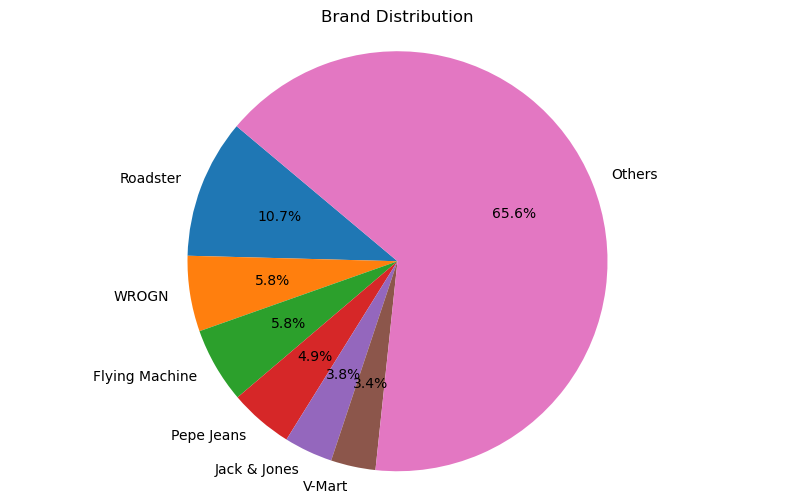

In [14]:
# Count the occurrences of each brand
brand_counts = df['brand'].value_counts()

# Separate brands with counts greater than 100 and label others as "Others"
threshold = 400
brands_above_threshold = brand_counts[brand_counts > threshold]
others_count = brand_counts[brand_counts <= threshold].sum()

# Combine into a new series
combined_counts = pd.concat([brands_above_threshold, pd.Series({'Others': others_count})])

# Plot the pie chart
plt.figure(figsize=(10, 6))
plt.pie(combined_counts, labels=combined_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Brand Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

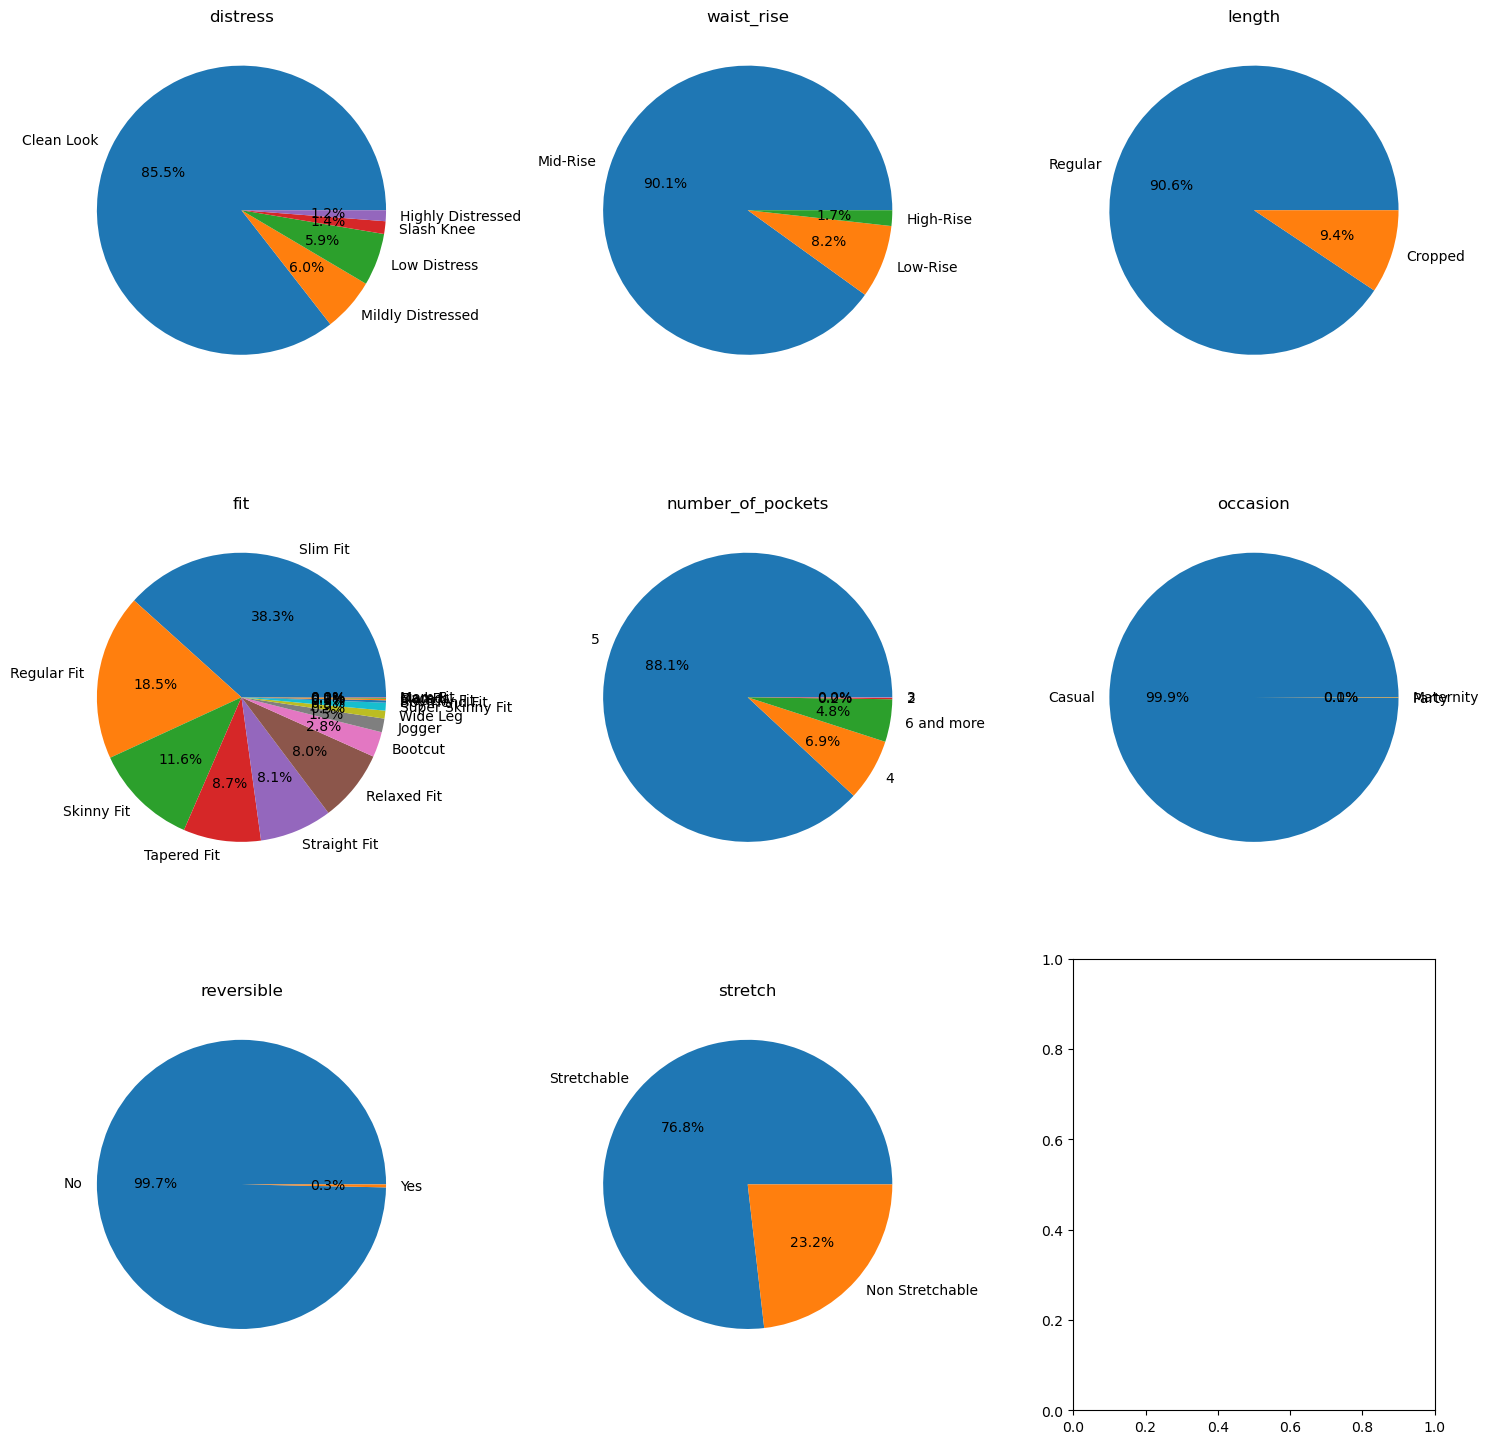

In [15]:
# List of categorical columns to plot
categorical_columns = ['distress', 'waist_rise', 'length', 'fit', 'number_of_pockets', 'occasion', 'reversible', 'stretch']

# Create subplots
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 15))
axes = axes.flatten()

# Plot pie charts
for ax, column in zip(axes, categorical_columns):
    value_counts = df[column].value_counts()
    ax.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%')
    ax.set_title(column)

# Adjust layout
plt.tight_layout()
plt.show()

Text(0, 0.5, 'Price of the jeans')

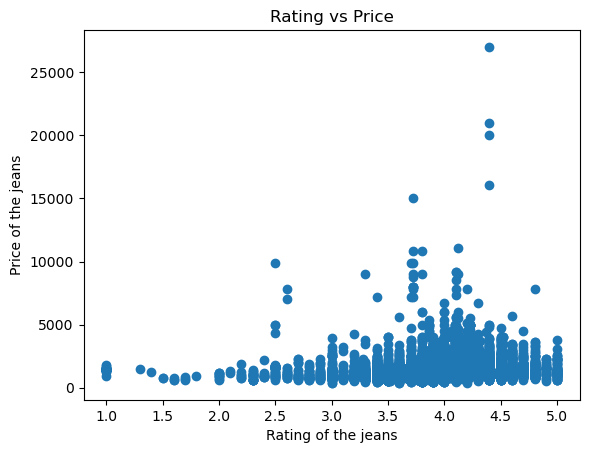

In [16]:
plt.scatter(df['rating'], df['price'])
plt.title("Rating vs Price")
plt.xlabel("Rating of the jeans")
plt.ylabel("Price of the jeans")

Text(0, 0.5, 'Price of the jeans')

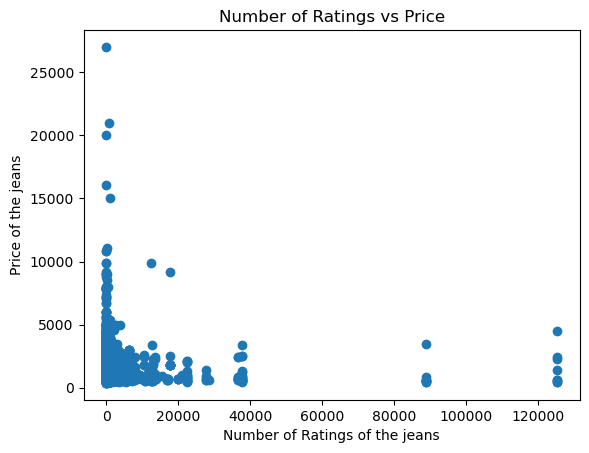

In [17]:
plt.scatter(df['number_of_ratings'], df['price'])
plt.title("Number of Ratings vs Price")
plt.xlabel("Number of Ratings of the jeans")
plt.ylabel("Price of the jeans")

Text(0.5, 0, 'Rating of the jeans')

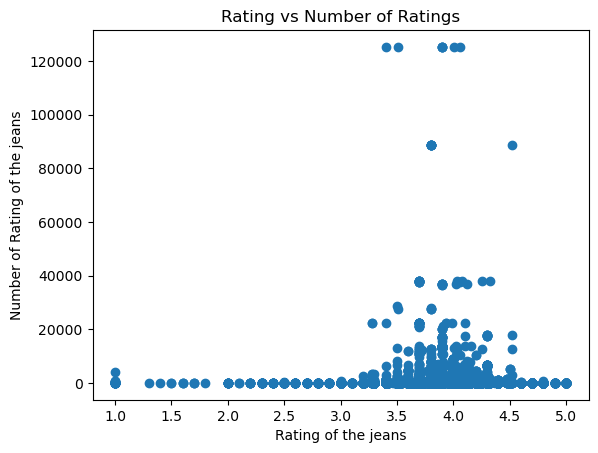

In [18]:
plt.scatter(df['rating'], df['number_of_ratings'])
plt.title("Rating vs Number of Ratings")
plt.ylabel("Number of Rating of the jeans")
plt.xlabel("Rating of the jeans")

In [19]:
# Removing occasion and reversible columns as they contains 99 percent of one category.
df.drop(['occasion', 'reversible', 'name'], axis=1, inplace=True)

In [20]:
df.to_csv('cleaned_jeans_data.csv', index=False)

## Model building for prediction of price

In [54]:
# Label Encoding
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

le1 = LabelEncoder()
le2 = LabelEncoder()

df['fit'] = le1.fit_transform(df['fit'])
df['brand'] = le2.fit_transform(df['brand'])

In [55]:
X = df.drop('price', axis = 1)
y = df['price']

In [56]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [57]:
df.head()

,brand,distress,waist_rise,length,fit,number_of_pockets,stretch,price,rating,number_of_ratings
0,89,Clean Look,Mid-Rise,Regular,9,5,Non Stretchable,1119,4.8,13
1,82,Clean Look,Mid-Rise,Regular,9,5,Stretchable,1499,4.4,259
2,142,Clean Look,Mid-Rise,Regular,9,5,Stretchable,601,3.9,17100
3,82,Clean Look,Mid-Rise,Regular,13,5,Stretchable,1829,4.1,96
4,70,Clean Look,Mid-Rise,Regular,0,5,Stretchable,2124,4.4,148


In [58]:
# One-Hot Encoding

oh_cat_features = ['distress', 'waist_rise', 'number_of_pockets', 'stretch', 'length']
le_cat_features = ['brand', 'fit']

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

oh_transformer = OneHotEncoder(drop = 'first')


preprocessor = ColumnTransformer(
    transformers=[
        ("OneHotEncoder", OneHotEncoder(drop='first'), oh_cat_features),
        ("LabelEncoderFit", 'passthrough', ['fit']),
        ("LabelEncoderBrand", 'passthrough', ['brand'])
    ], remainder='passthrough'
)

In [59]:
X_train = preprocessor.fit_transform(X_train)

In [60]:
X_test = preprocessor.transform(X_test)

In [61]:
from sklearn.ensemble import RandomForestRegressor

randomForest = RandomForestRegressor()
randomForest.fit(X_train, y_train)

RandomForestRegressor()

In [62]:
y_pred = randomForest.predict(X_test)

In [63]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

print("r2", r2_score(y_test, y_pred))
print("mean_absolute_error", mean_absolute_error(y_test, y_pred))
print("mean_squared_error", mean_squared_error(y_test, y_pred))

r2 0.7041295999914885
mean_absolute_error 213.52637871217007
mean_squared_error 230407.02487099348


In [60]:
params = {
            "max_depth": [100, 110, 90, 115, 95],
            "max_features": ['sqrt', 'log2', None],
            "min_samples_split": [2, 1, 4, 5],
            "n_estimators": [100, 110, 90, 95],
            "criterion" : ["squared_error", "absolute_error", "friedman_mse", "poisson"]
         }

In [61]:
from sklearn.model_selection import RandomizedSearchCV

randomizedCV = RandomizedSearchCV(estimator=RandomForestRegressor(), param_distributions=params, n_iter=100, cv=3, verbose=3, n_jobs=-1)

In [62]:
randomizedCV.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


C:\Users\ashwi\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
75 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
75 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\ashwi\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ashwi\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py", line 340, in fit
    self._validate_params()
  File "C:\Users\ashwi\anaconda3\Lib\site-packages\sklearn\base.py", line 600, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\ashwi\anaconda3\Lib\site-packag

RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'criterion': ['squared_error',
                                                      'absolute_error',
                                                      'friedman_mse',
                                                      'poisson'],
                                        'max_depth': [100, 110, 90, 115, 95],
                                        'max_features': ['sqrt', 'log2', None],
                                        'min_samples_split': [2, 1, 4, 5],
                                        'n_estimators': [100, 110, 90, 95]},
                   verbose=3)

In [63]:
y_pred_randomized = randomizedCV.predict(X_test)

In [64]:
randomizedCV.best_params_

{'n_estimators': 90,
 'min_samples_split': 2,
 'max_features': None,
 'max_depth': 90,
 'criterion': 'poisson'}

In [65]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

print("r2", r2_score(y_test, y_pred_randomized))
print("mean_absolute_error", mean_absolute_error(y_test, y_pred_randomized))
print("mean_squared_error", mean_squared_error(y_test, y_pred_randomized))

r2 0.7225712547802188
mean_absolute_error 209.6488485563072
mean_squared_error 216045.71392725932


In [64]:
from sklearn.ensemble import RandomForestRegressor

randomForest = RandomForestRegressor(n_estimators=100, min_samples_split=2, max_features=None, max_depth=100, criterion='poisson')
randomForest.fit(X_train, y_train)

RandomForestRegressor(criterion='poisson', max_depth=100, max_features=None)

In [65]:
y_pred_hypertunned = randomForest.predict(X_test)

In [66]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

print("r2", r2_score(y_test, y_pred_hypertunned))
print("mean_absolute_error", mean_absolute_error(y_test, y_pred_hypertunned))
print("mean_squared_error", mean_squared_error(y_test, y_pred_hypertunned))


r2 0.7236862528265053
mean_absolute_error 210.61525575130273
mean_squared_error 215177.41692095366


In [67]:
df.head()

,brand,distress,waist_rise,length,fit,number_of_pockets,stretch,price,rating,number_of_ratings
0,89,Clean Look,Mid-Rise,Regular,9,5,Non Stretchable,1119,4.8,13
1,82,Clean Look,Mid-Rise,Regular,9,5,Stretchable,1499,4.4,259
2,142,Clean Look,Mid-Rise,Regular,9,5,Stretchable,601,3.9,17100
3,82,Clean Look,Mid-Rise,Regular,13,5,Stretchable,1829,4.1,96
4,70,Clean Look,Mid-Rise,Regular,0,5,Stretchable,2124,4.4,148


In [76]:
new_sample = pd.DataFrame({
    "brand": ['Jack & Jones'],
    "distress": ["Clean Look"],
    "waist_rise": ["Mid-Rise"],
    "length": ["Regular"],
    "fit": ["Regular Fit"],
    "number_of_pockets": ["5"],
    "stretch": ["Stretchable"],
    "rating": [4.2],
    "number_of_ratings": [70]
})

# Apply Label Encoding to the new sample
new_sample['fit'] = le1.transform(new_sample['fit'])
new_sample['brand'] = le2.transform(new_sample['brand'])

# Apply One-Hot Encoding to the new sample
new_sample_encoded = preprocessor.transform(new_sample)

In [77]:
pd.DataFrame(new_sample_encoded)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,6.0,70.0,4.2,70.0


In [173]:
pd.DataFrame(new_sample_encoded)

,0,1,2,3
0,0.0,1.0,4.1,96.0


In [78]:
prediction = randomForest.predict(new_sample_encoded)

In [79]:
prediction

array([2317.7])